# Initial State Distributions
For the classic control environments the initial state distributions are narrow. With CARL (Contextually Adapative RL)
we can contextualize the environments, i.e. make the parameters defining the environment configurable.
This is an example of how the modification of context results in more comprehensive initial state distributions.

## Collect Initial States
We collect the initial states, once of the classic environments and once of the contextually extended environments.

In [1]:
import sys
sys.path.append("..")
import importlib
import carl.envs
importlib.reload(carl.envs)
from carl.envs import CARLCartPole, CARLAcrobot, CARLMountainCar, CARLPendulum
import numpy as np
from tqdm import tqdm
from typing import Dict


def get_renders(env_specs: Dict):
    renders = {}
    states = {}
    for env_cls, contexts in env_specs.items():
        print(env_cls.__name__)
        env = env_cls(contexts=contexts)
        _renders = []
        _states = []
        for i in tqdm(range(n_initial_states)):
            s, _ = env.reset()
            _states.append(s["obs"])
            _renders.append(env.render())
        renders[env_cls.__name__] = _renders
        states[env_cls.__name__] = np.array(_states)
    return renders, states


n_initial_states = 50
n_contexts = 100

# Sample contexts for the parametrizations of the initial state distributions
contexts_acrobot = dict()
contexts_cartpole = dict()
contexts_pendulum = dict()
contexts_mountaincar = dict()
for i in range(n_contexts):
    # Sample for Acrobot
    initial_angle_lower = np.random.uniform(- np.pi, 0)
    initial_angle_upper = np.random.uniform(min(0,initial_angle_lower), np.pi)
    initial_velocity_lower = np.random.uniform(- 1, 0)
    initial_velocity_upper = np.random.uniform(min(0,initial_velocity_lower), 1)
    context = {
        "INITIAL_ANGLE_LOWER": initial_angle_lower,
        "INITIAL_ANGLE_UPPER": initial_angle_upper,
        "INITIAL_VELOCITY_LOWER": initial_velocity_lower,
        "INITIAL_VELOCITY_UPPER": initial_velocity_upper,
    }
    contexts_acrobot[i] = context

    # Sample for CartPole
    initial_state_lower = np.random.uniform(-1, 1)
    initial_state_upper = np.random.uniform(max(0,initial_state_lower), 1)
    context = {
        "initial_state_lower": initial_state_lower,
        "initial_state_upper": initial_state_upper,
    }
    contexts_cartpole[i] = context

    # Sample for Pendulum
    initial_angle_max = np.random.uniform(0, np.pi/4)
    initial_velocity_max = np.random.uniform(1e-4, 10)
    context = {
        "initial_angle_max": initial_angle_max,
        "initial_velocity_max": initial_velocity_max,
    }
    contexts_pendulum[i] = context

    # Sample for MountainCar
    min_position_start = np.random.uniform(-1.5, 0.3)
    max_position_start = np.random.uniform(min_position_start, 0.3)
    min_velocity_start = np.random.uniform(-1, 1)
    max_velocity_start = np.random.uniform(min_velocity_start, 1)
    context = {
        "min_position_start": min_position_start,
        "max_position_start": max_position_start,
        "min_velocity_start": min_velocity_start,
        "max_velocity_start": max_velocity_start,
    }
    contexts_mountaincar[i] = context

env_specs = {
    CARLCartPole: contexts_cartpole,
    CARLAcrobot: contexts_acrobot,
    CARLPendulum: contexts_pendulum,
    CARLMountainCar: contexts_mountaincar,
}

env_specs_classic = {k: None for k in env_specs.keys()}

# Collect initial states
renders, states = get_renders(env_specs=env_specs)
renders_classic, states_classic = get_renders(env_specs=env_specs_classic)

/Users/theeimer/Documents/git/CARL/examples/../carl/envs/__init__.py:36: UserWarning: Module py4j not found. If you want to use these environments, please follow the installation guide.
  warnings.warn(
/Users/theeimer/Documents/git/CARL/examples/../carl/envs/__init__.py:36: UserWarning: Module distance not found. If you want to use these environments, please follow the installation guide.
  warnings.warn(
/Users/theeimer/Documents/git/CARL/examples/../carl/__init__.py:55: UserWarning: Module py4j not found. If you want to use these environments,
                    please follow the installation guide.
  warnings.warn(
/Users/theeimer/Documents/git/CARL/examples/../carl/envs/__init__.py:36: UserWarning: Module py4j not found. If you want to use these environments, please follow the installation guide.
  warnings.warn(
/Users/theeimer/Documents/git/CARL/examples/../carl/envs/__init__.py:36: UserWarning: Module distance not found. If you want to use these environments, please follow the

CARLCartPole


100%|██████████| 50/50 [00:00<00:00, 56.88it/s]


CARLAcrobot


100%|██████████| 50/50 [00:00<00:00, 625.56it/s]


CARLPendulum


100%|██████████| 50/50 [00:00<00:00, 645.98it/s]


CARLMountainCar


100%|██████████| 50/50 [00:00<00:00, 732.54it/s]


CARLCartPole


100%|██████████| 50/50 [00:00<00:00, 951.44it/s]


CARLAcrobot


100%|██████████| 50/50 [00:00<00:00, 734.97it/s]


CARLPendulum


100%|██████████| 50/50 [00:00<00:00, 753.31it/s]


CARLMountainCar


100%|██████████| 50/50 [00:00<00:00, 782.47it/s]


## Classic vs. Contextual Initial State Distributions
The contextually extended CARL environments show a much higher variety in the initial state distributions
thus aiming for generalization starting from the first state.
The figure displays the average of 50 initial states.

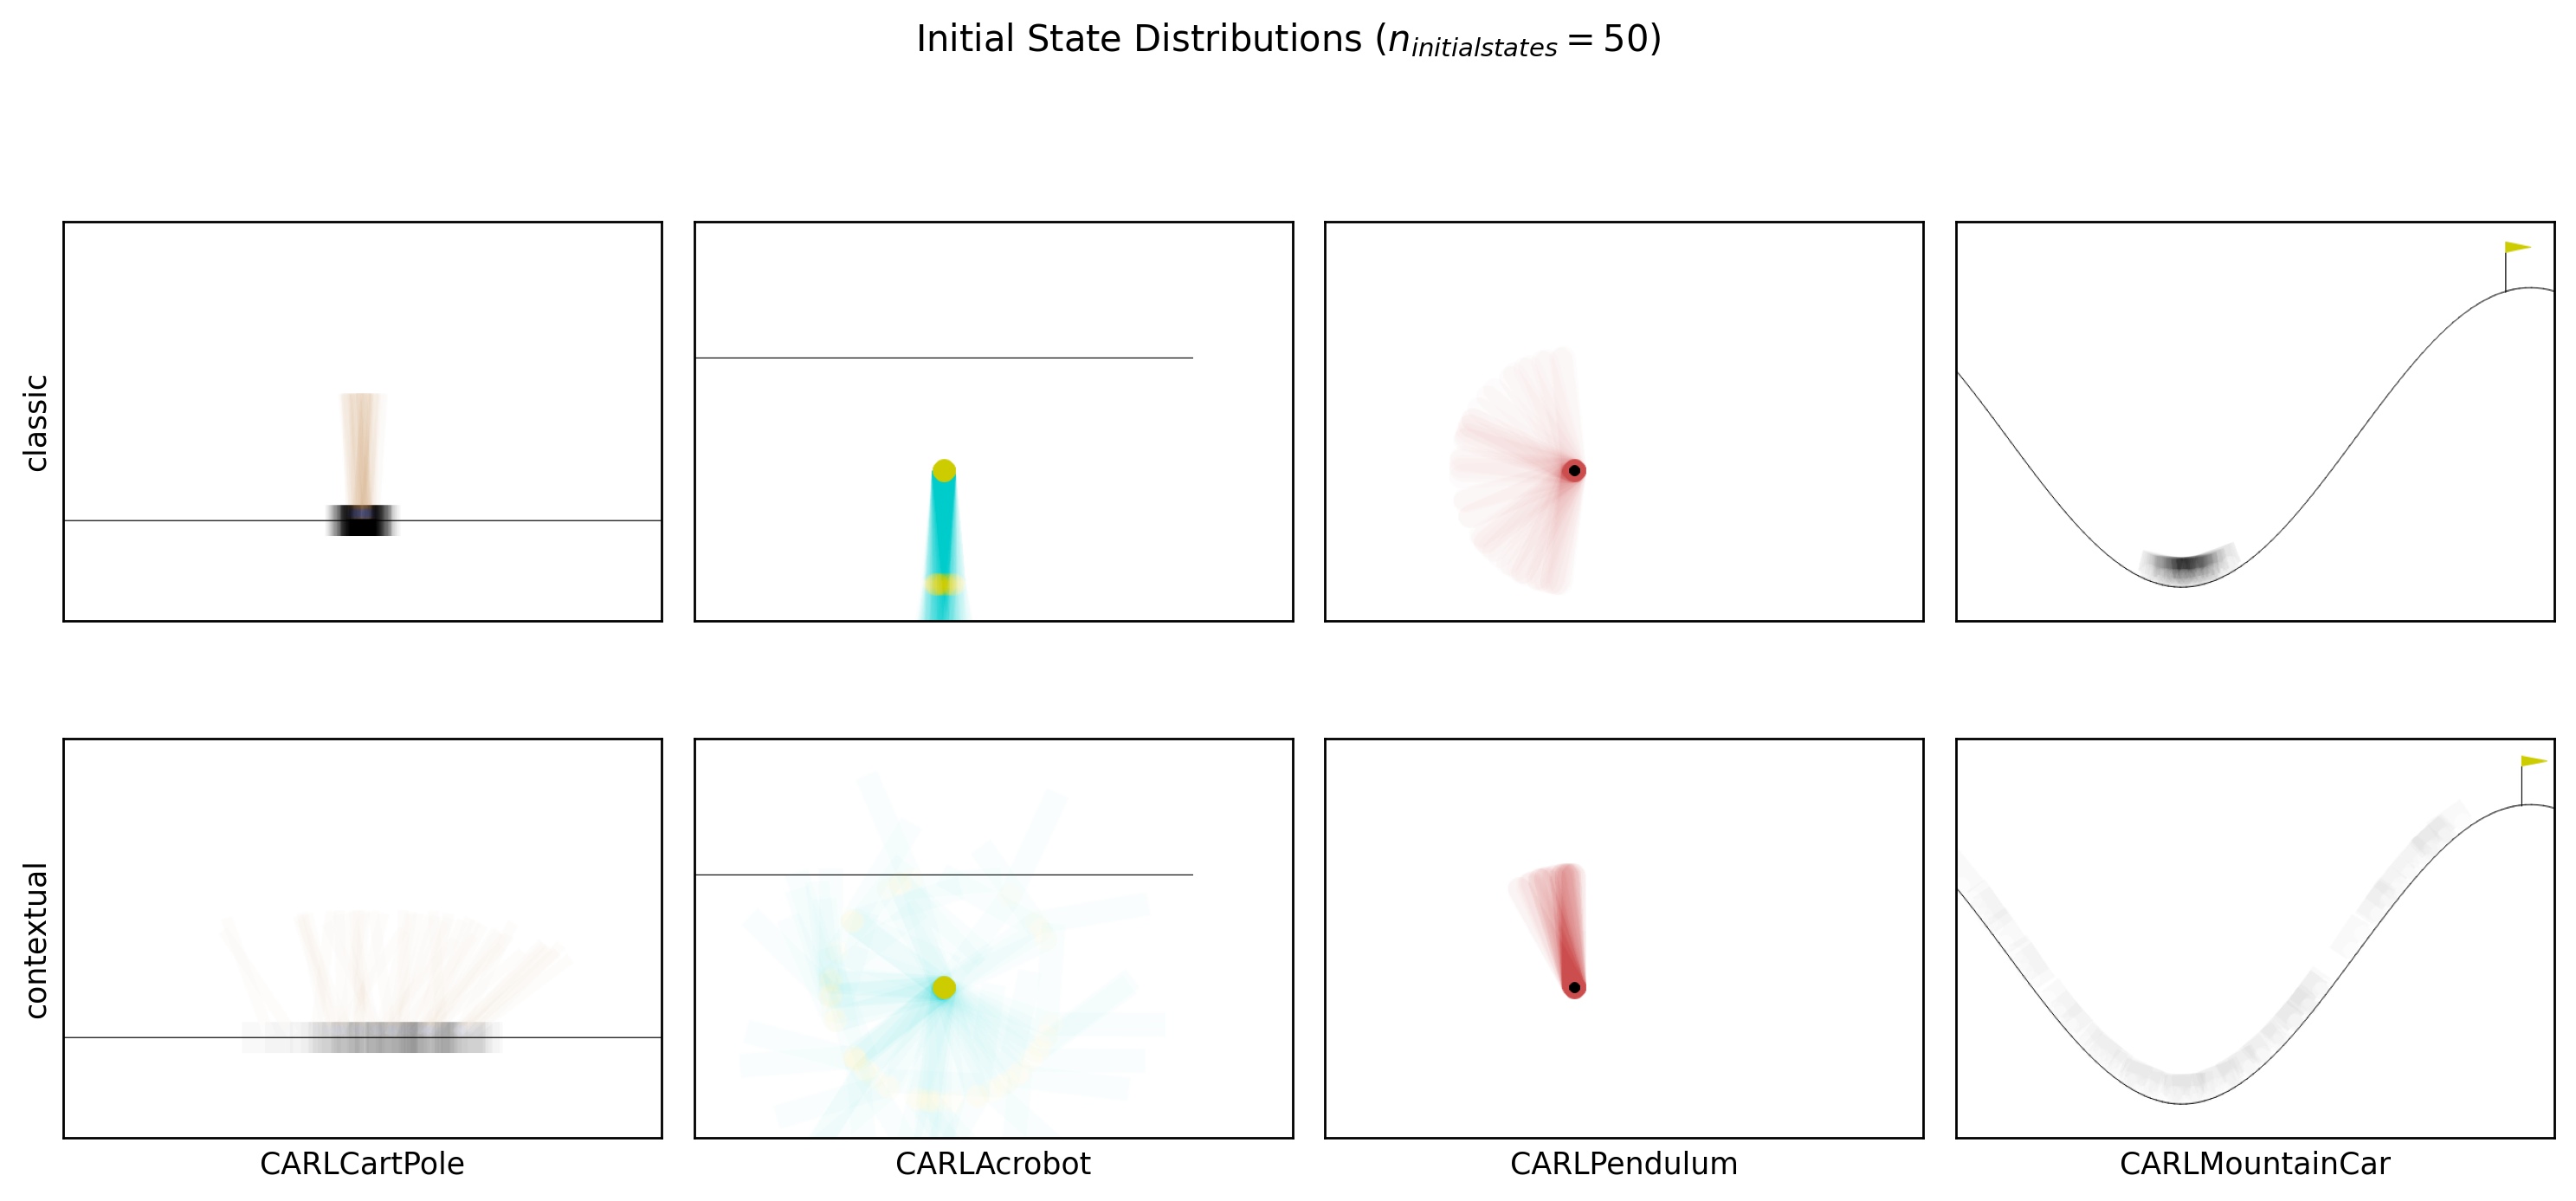

In [2]:
# Render initial states

import matplotlib.pyplot as plt

title = f"Initial State Distributions ($n_{{initial states}} = {n_initial_states}$)"

data = {
    "classic": renders_classic,
    "contextual": renders
}
nrows = len(data)
ncols = len(data["classic"])
enlarge = 3
fig = plt.figure(figsize=(ncols * enlarge, nrows * enlarge), dpi=250)
axes = fig.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
for i, (init_type, renders) in enumerate(data.items()):
    for j, (env_name, _renders) in enumerate(renders.items()):
        ax = axes[i, j]
        _renders = np.array(_renders)
        render = np.mean(_renders, axis=0)/255
        ax.imshow(render)
        # ax.axis('off')
        ax.set_xticks([])
        ax.set_yticks([])
        if i == nrows - 1:
            ax.set_xlabel(env_name)
        if j == 0:
            ax.set_ylabel(init_type)
if title:
    fig.suptitle(title)

fig.set_tight_layout(True)
plt.show()